# GD

导入包，设置随机数种子以及预设值


In [1]:
from numpy.random import seed
from data_generator import *
from algo import GD, PseudoInverse
seed(777)

n = 50
m = 200  # 200 个数据
stopping_gap = 0.01  # 停止条件

## 生成数据

In [2]:
x_gt = gen_data_x(n)
A = gen_data_A(m, n)
_b_real = np.matmul(A, x_gt)
var_Ax = np.var(_b_real)
var_eps = var_Ax / 20
eps = gen_data_eps(np.sqrt(var_eps), m)
b = _b_real + eps

为了验证生成的数据没有问题，我们计算一下`_b_real` 和 `b` 之间的相关性：

In [3]:
print(f"相关性为{compute_corr(_b_real, b):.3f}。")

相关性为0.975。


相关性很好，说明生成的数据和预期差距不大。我们可以继续进行下一步了。
## 算法
### 回溯直线搜索

接着我们来初始化一下Gradient Descent 计算器：

In [4]:
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stopping_gap=stopping_gap, mode="backtracking")
x_est = gd.gd()
print(f"采用{gd.mode}方法在{gd.stat_step_count}步后收敛，\n耗时{gd.stat_time:.4f}，拟合结果和真实结果的差值的二范数是{gd.norm(x_gt, x_est):.3f}。")

采用backtracking方法在12步后收敛，
耗时0.0056，拟合结果和真实结果的差值的二范数是1.097。


接下来绘制 objective value 的变化图：

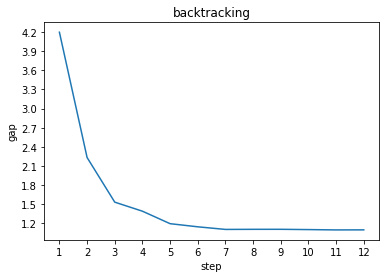

In [5]:
gd.draw_improves()

### 固定步长
做法类似，

In [6]:
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stopping_gap=stopping_gap, mode="fixed")
x_est = gd.gd()
print(f"采用{gd.mode}方法在{gd.stat_step_count}步后收敛，\n耗时{gd.stat_time:.4f}，拟合结果和真实结果的差值的二范数是{gd.norm(x_gt, x_est):.3f}。")

采用fixed方法在39步后收敛，
耗时0.0052，拟合结果和真实结果的差值的二范数是1.122。


接下来绘制 objective value 的变化图：

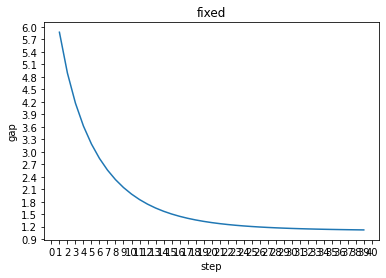

In [7]:
gd.draw_improves()

## 伪逆法

In [8]:
pi = PseudoInverse(n=n, m=m, A=A, b=b, x_gt=x_gt)
x_est = pi.compute()
print(f"采用求伪逆方法在耗时{gd.stat_time:.4f}，\n拟合结果和真实结果的差值的二范数是{gd.norm(x_gt, x_est):.3f}。")

采用求伪逆方法在耗时0.0052，拟合结果和真实结果的差值的二范数是1.097。
